![alt](https://intuitivetutorial.com/wp-content/uploads/2023/04/knn-1.png)

# K-Nearest Neighbors (K-NN)

#### What is K-NN?
https://intuitivetutorial.com/2023/04/07/k-nearest-neighbors-algorithm/

**K-Nearest Neighbors (K-NN)** is a simple, instance-based learning algorithm used for both classification and regression tasks. The basic idea is to predict the output of a new data point based on the majority class (in classification) or average (in regression) of its \( K \) closest training samples in the feature space. It is a non-parametric method, meaning it does not assume any underlying distribution of the data.

##### 1. Decide the number K in KNN
 K in KNN algorithms is the number of neighborhood points to a query point. The assignment of a class label to a query point depends on the hyperparameter K.

i.e., if we assign a value of 5 for K, then we have to consider 5 nearest neighbor data points to the query point. The class label will be assigned based on the majority class label out of the 5 neighborhood points. 
 K can be assigned to any positive integer value but it is more likely to assign odd positive integers to avoid the tie arise while taking a majority vote to predict class label.


#### KNN Algorithm

The K-NN algorithm consists of the following steps:

1. **Choose the value of \( K \)**: Select the number of neighbors to consider.
2. **Calculate the distance**: Measure the distance between the input data point and all training data points. Common distance metrics include:
   - Euclidean distance
   - Manhattan distance
   - Minkowski distance
3. **Find the K nearest neighbors**: Identify the \( K \) training samples closest to the input data point.
4. **Make a prediction**:
   - **For classification**: Assign the class label that appears most frequently among the K neighbors.
   - **For regression**: Calculate the average of the values of the K neighbors.

#### Working of K-NN

1. **Distance Calculation**: For a new data point, compute its distance from each point in the training dataset using a distance metric.
2. **Sorting**: Sort all the distances in ascending order.
3. **Selecting Neighbors**: Select the top \( K \) entries from the sorted list.
4. **Voting (for classification)** or **Averaging (for regression)**: For classification, perform a majority vote among the selected neighbors. For regression, compute the mean of the selected neighbors.

### How to Choose the Value of K?

Choosing the right value of \( K \) is crucial for the performance of K-NN:

1. **Odd vs. Even**: In classification tasks, choose an odd value of \( K \) to avoid ties.
2. **Cross-Validation**: Use techniques like k-fold cross-validation to determine the best value of \( K \). Train the model on subsets of data and evaluate it on the remaining data.
3. **Testing Range**: Experiment with different values of \( K \) (e.g., 1, 3, 5, 7, etc.) and observe the model's performance metrics (accuracy, F1 score, etc.).
4. **Bias-Variance Tradeoff**:
   - **Small \( K \)**: May lead to high variance and overfitting (model captures noise).
   - **Large \( K \)**: May lead to high bias and underfitting (model oversimplifies).


### Example Code for K-NN


k is hyper parameter

easy to understand/very intutive
performance of the model in terms of evaluations is good

disAdv
- model is not robust to outliers
- computions time is high --> lazy learners (because of brute force )


variant of knn
- k-d tree - partition the data into binary tree (so reduce the search time)
- ball tree - A ball tree partitions data points into a nested set of balls.

A Ball Tree is another data structure that organizes the data points into a tree structure by enclosing them within hyperspheres. The main goal of a Ball Tree is to reduce the search complexity for finding the nearest neighbors of a data point in a high-dimensional space.

kNN use when small data set 

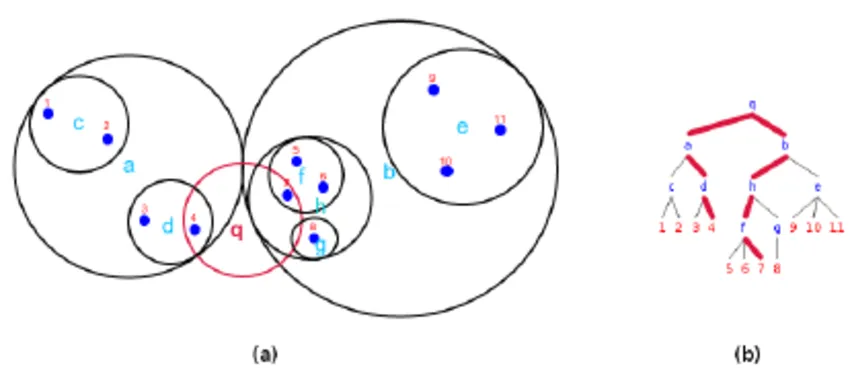


- kNN Classifier Tutorial
    - https://www.kaggle.com/code/prashant111/knn-classifier-tutorial



https://keylabs.ai/blog/k-nearest-neighbors-knn-real-world-applications/

https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
# create dummy dataset or Load the dataset
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples = 1000, n_features=3, n_redundant=0, n_classes=2, random_state=1)


# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
X_train

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
       [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
       [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
       [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
       [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
       [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
       [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
       [ 0.59831066, -0.

In [6]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [7]:
# import MOdel
from sklearn.neighbors import KNeighborsClassifier

In [8]:
## Create a K-NN classifier with K=3  k value 
k = 5

clf = KNeighborsClassifier(n_neighbors=k)
clf

KNeighborsClassifier()

Choosing the Value of ( K ):

The choice of ( K ) is crucial for model performance.
Odd values of ( K ) are preferred to avoid ties in classification tasks.
Techniques like k-fold cross-validation can help determine the best value of ( K ).
A small ( K ) may lead to high variance and overfitting, while a large ( K ) may lead to high bias and underfitting.


In [9]:
# Train the model
clf.fit(X_train, y_train)


KNeighborsClassifier()

In [10]:
# Make predictions
y_pred = clf.predict(X_test)

In [11]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"K-NN Accuracy (K={k}): {accuracy:.2f}")
print(confusion_matrix(y_test,y_pred))


K-NN Accuracy (K=5): 1.00
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [13]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
# Hyperparameter tuning  --> to improve the model accuracy and efficiency -- 
# Hyperparameter tuning  work for same for all model only change parameter and model
# using GridSearchCV from sklearn.model_selection module

# https://www.geeksforgeeks.org/machine-learning/hyperparameter-tuning/

In [15]:
# define the parameter values in a dictionary format
param_grid = {"n_neighbors": [3, 5, 6, 7, 10, 12, 15],
             'algorithm': ['ball_tree', 'brute', 'kd_tree'],
             'leaf_size': [20, 30, 40 , 50]}

- *n_neighbors:* This parameter specifies the number of neighbors to use when making predictions. The values provided in the grid are [3, 5, 6, 7, 10, 12, 15]. A smaller value of n_neighbors can lead to a model that is sensitive to noise in the data, while a larger value can smooth out the predictions but may overlook local patterns.


- algorithm: This parameter defines the algorithm used to compute the nearest   neighbors. The options available are:
    - ball_tree: A tree-based algorithm that is efficient for high-dimensional data.
    - brute: A brute-force search that computes distances between all points, which can be slow for large datasets.
    - kd_tree: A tree-based algorithm that is efficient for low-dimensional data.

- leaf_size: This parameter affects the speed of the construction and query of the tree. The values provided are [20, 30, 40, 50]. A smaller leaf size can lead to a more accurate model but may increase the computation time, while a larger leaf size can speed up the computation but may reduce accuracy.

In [16]:
param_grid

{'n_neighbors': [3, 5, 6, 7, 10, 12, 15],
 'algorithm': ['ball_tree', 'brute', 'kd_tree'],
 'leaf_size': [20, 30, 40, 50]}

In [17]:
# tuning the model
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=clf, param_grid=param_grid ,cv =2, scoring="accuracy" verbose=3)
grid

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2823427525.py, line 3)

In [ ]:
# run the model
grid.fit(X_train, y_train)

Fitting 2 folds for each of 84 candidates, totalling 168 fits
[CV 1/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.917 total time=   0.0s
[CV 2/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.933 total time=   0.0s
[CV 1/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=5;, score=0.917 total time=   0.0s
[CV 2/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=5;, score=0.933 total time=   0.0s
[CV 1/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=6;, score=0.867 total time=   0.0s
[CV 2/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=6;, score=0.950 total time=   0.0s
[CV 1/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=7;, score=0.933 total time=   0.0s
[CV 2/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=7;, score=0.950 total time=   0.0s
[CV 1/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.933 total time=   0.0s
[CV 2/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.950 total

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'brute', 'kd_tree'],
                         'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [3, 5, 6, 7, 10, 12, 15]},
             verbose=3)

In [ ]:
# check the best model paramter
grid.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 7}

In [ ]:
# check the best model accuracy
grid.best_score_

np.float64(0.9416666666666667)

In [ ]:
# use the best model  for the future predictions
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9666666666666667

#### KNN use as missing value treatment
- another usecase of knn

In [ ]:
#knn as misisng value treatment

import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]


In [ ]:
print(X)

[[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]


In [ ]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

## KNN Regression code



### Explanation of the Code

1. **Import Libraries**: We import necessary libraries for data generation, model training, and visualization.

2. **Create a Synthetic Dataset**: 
   - We use the `make_regression` function to generate a synthetic regression dataset with one feature. The `noise` parameter adds variability to the target variable.

3. **Split the Data**: 
   - The dataset is split into training (70%) and testing (30%) sets using `train_test_split`.

4. **Create the Regressor**: 
   - A `KNeighborsRegressor` is created with \( K = 5 \).

5. **Train the Model**: 
   - The model is trained on the training data using the `fit` method.

6. **Make Predictions**: 
   - Predictions are made on the test set using the `predict` method.

7. **Evaluate Performance**: 
   - The Mean Squared Error (MSE) and R² score are calculated to evaluate the model's performance.

8. **Visualize Predictions**: 
   - A scatter plot is created to show the actual vs. predicted values, allowing for a visual assessment of model performance.

### Conclusion

This example demonstrates how to implement K-NN for regression tasks using `scikit-learn`. You can experiment with different values of \( K \), different datasets, and various distance metrics to see how they affect the model's performance.

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Create a synthetic regression dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 1000, n_features=3,noise = 3, random_state=1)
X
y

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.shape, X_test.shape

# Create a K-NN Regressor 
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()

# Train the model
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"K-NN Regression Mean Squared Error: {mse:.2f}")
print(f"K-NN Regression R^2 Score: {r2:.2f}")



# hyperparameter tuning
param_grid = {"n_neighbors": [3, 5, 6, 7, 10, 12, 15],
             'algorithm': ['ball_tree', 'brute', 'kd_tree'],
             'leaf_size': [20, 30, 40 , 50]}

param_grid

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=reg, param_grid=param_grid, cv = 5, verbose=3)
grid

grid.fit(X_train, y_train)



K-NN Regression Mean Squared Error: 815.22
K-NN Regression R^2 Score: 0.97
Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.968 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.972 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.967 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.979 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.958 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5;, score=0.972 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5;, score=0.969 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5;, score=0.968 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=5;, score=0.972 total time=   0.0s
[CV 5/5]

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'brute', 'kd_tree'],
                         'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [3, 5, 6, 7, 10, 12, 15]},
             verbose=3)

In [ ]:
grid.best_params_

grid.best_score_

np.float64(0.9687257312132287)

### also show ploting when number of features in 1

K-NN Regression Mean Squared Error: 340.60
K-NN Regression R^2 Score: 0.96


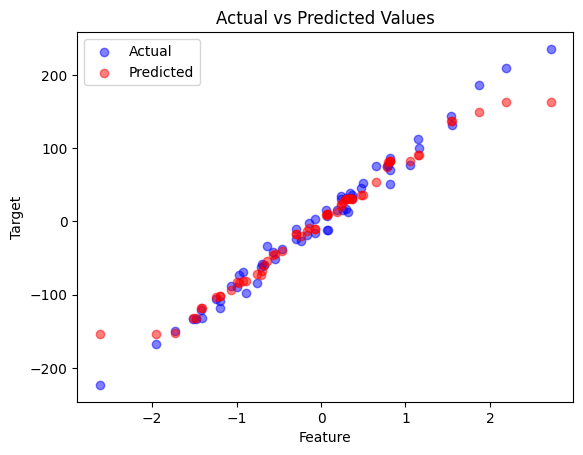

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a K-NN Regressor with K=5
k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"K-NN Regression Mean Squared Error: {mse:.2f}")
print(f"K-NN Regression R^2 Score: {r2:.2f}")

# Visualize the predictions
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.title("Actual vs Predicted Values")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


### Example Code 
- Applying KNN for regression on Zomato dataset
    - https://www.kaggle.com/code/akshat0007/applying-knn-for-regression-on-zomato-dataset

- kNN Classifier Tutorial
    - https://www.kaggle.com/code/prashant111/knn-classifier-tutorial

https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

https://keylabs.ai/blog/k-nearest-neighbors-knn-real-world-applications/


https://www.geeksforgeeks.org/difference-between-parametric-and-non-parametric-methods/

https://machinelearningmastery.com/distance-measures-for-machine-learning/